## AirBnb assignment 1

The following questions will be answered in this assignment: 
- What Amsterdam will receive from tourist tax if the event lasts a week and you will
have 30.000 visitors
- Plot the amount of AirBnb locations per neighbourhood
- Which street in Amstrdam has the most AirBnB apartments?
- ...?
### Tourist tax for the municipality of Amsterdam?

In [54]:
import pandas as pd
import os.path
import re

path = "C:/Users/bogee/Documents/Master/MADE/Data I/AirBnB/listings.csv"

bnb_df = pd.read_csv(path)
#print('Columns in file:\n', bnb_df.columns)

bnb_nf = bnb_df.loc[(bnb_df['room_type'] != "Private room") & (bnb_df['minimum_nights'] < 8) & (bnb_df['availability_365'] >= 7)]
print(bnb_nf)

split_name = bnb_nf['name'].str.split('\u00B7', expand=True)
split_name.columns = ['Property', 'Rating', 'Bedrooms', 'Beds', 'Baths']
bnb_nf = pd.concat([bnb_nf, split_name], axis = 1)
#bnb_df = pd.DataFrame(big_list, columns=['Unit', 'Rating', 'Type', 'Beds', 'Bath'])

def set_to_zero_if_not_startswith(value, prefix):
    if not str(value).startswith(prefix):
        return 0
    return value
    
prefix_to_match = "\u2605"
bnb_nf['Rating'] = bnb_nf['Rating'].apply(lambda x: set_to_zero_if_not_startswith(x, prefix_to_match))

print(bnb_nf)

'''
def remove_ratings(text):
    # Use regular expression to remove ratings (e.g., ★4.74)
    return re.sub(r'★\d+\.\d+\s', '', text)


print(type(bnb_df['name'][2]))

for i in bnb_df['name']:
    bnb_df['name'][i] = bnb_df['name'][i].apply(remove_ratings)

print(bnb_df)


big_list = []

for index in range(len(bnb_nf)):
    cel = bnb_nf['name'].iloc[index]
    cel_replace = cel.replace('\u00B7', ',')
    cel_split = cel_replace.split(",")
    big_list.append(cel_split)

cleaned_data = [remove_ratings(item) for item in big_list]
for item in big_list:
    for i in cleaned_data:
        print(item)
'''

# Filtering the AirBnB data;
# Selecting only the Private rooms, as we the amount of persons that can stay in an entire apartment varies.
# Selecting a minimum nights of lower than eight, as the event lasts a week. Rooms that have a required number of minimum nights
# higher than eight are not suitable.
# Selecting an availability per year equal or higher than seven, cause an amount lower is not suitable

bnb_wp = bnb_df.loc[(bnb_df['room_type'] == "Private room") & (bnb_df['minimum_nights'] < 8) & (bnb_df['availability_365'] >= 7)]

#print(bnb_wp, '\n')

# Selecting only entire apartments, how to find out how many people can stay in which apartment??


#print(bnb_nf)


#print(bnb_nf)

#remove name columns and place split_name at 1st place

#print(big_list)



#print(df_beds)

bed_counts = df_beds['Beds'].value_counts()
print(bed_counts)


# Number of rooms booked, assuming a Private room can hosts two persons

visitors = 30000
pv_rooms = bnb_wp['room_type'].size #is this with the heading 'room_type' ?? ; amount of private rooms available
print('The amount of private rooms available is', pv_rooms, '\n') # = 1427 private rooms available
people_private = 2 * pv_rooms
print(people_private, 'people are able to stay in the available private rooms in Amsterdam\n')
people_ap = visitors - people_private
print(people_ap, 'people have to stay in apartment\n')

rooms = int(visitors / 2) #assuming everyone stays with two persons in a room
#print('The amount of bookings of private rooms for 30000 people is', rooms) # = 15000 bookings (only private)

# Assuming for now that the amount of Private rooms can host everyong -> not true though !!

toeristenbelasting = 10
tourist_tax = 0.10
print('The tourist tax in Amsterdam is %s %%.' % toeristenbelasting, 'Source: Gemeente Amsterdam(n.d.) Toeristenbelasting. https://www.amsterdam.nl/veelgevraagd/toeristenbelasting-2c7c2#\n')

df_tax = pd.DataFrame(columns=['price_tax'])

bnb_wp.index

# Using index method

#for index in bnb_wp.index:
#    tax = bnb_wp['price'][index] * tourist_tax
#    df_tax.loc[index] = [tax]


#Using iloc[] method to calculate the tourist tax and fill this in a new data frame

for index in range(len(bnb_wp)):
    tax = bnb_wp.iloc[index, 9] * tourist_tax
    df_tax.loc[index] = [tax]

print(df_tax)

total_tax = df_tax['price_tax'].sum()*7
print(f'\nThe total amount of tourist tax Amsterdam will receive is \u20ac {total_tax: .2f}') #nog vermenigvuldigen met aantal dagen

                      id                                               name  \
1                 768274  Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...   
14                 48373  Rental unit in Amsterdam · 2 bedrooms · 2 beds...   
15                 49552  Guest suite in Amsterdam · ★4.92 · 2 bedrooms ...   
16                 50263  Condo in Amsterdam · ★4.87 · 2 bedrooms · 3 be...   
18                 53921  Rental unit in Amsterdam · ★5.0 · 1 bedroom · ...   
...                  ...                                                ...   
8380  970939750211583641  Rental unit in Amsterdam · ★New · 2 bedrooms ·...   
8381  971403658453358540  Rental unit in Amsterdam · ★New · 1 bedroom · ...   
8382  971600466535392582  Home in Amsterdam · ★New · 3 bedrooms · 3 beds...   
8383  971686543447319533  Rental unit in Amsterdam · ★New · 1 bedroom · ...   
8385  972218247170836285  Condo in Amsterdam · ★New · 2 bedrooms · 1 bed...   

          host_id      host_name  neighbourhood_gro

### Plotting the amount of AirBnb locations per neighbourhood

neighbourhood
Centrum-West                              315
Centrum-Oost                              208
De Baarsjes - Oud-West                    149
De Pijp - Rivierenbuurt                   101
Zuid                                       83
Oud-Noord                                  66
Westerpark                                 58
Oud-Oost                                   50
Watergraafsmeer                            47
Oostelijk Havengebied - Indische Buurt     43
Geuzenveld - Slotermeer                    39
IJburg - Zeeburgereiland                   35
Noord-West                                 34
De Aker - Nieuw Sloten                     32
Noord-Oost                                 30
Slotervaart                                27
Bos en Lommer                              26
Buitenveldert - Zuidas                     23
Bijlmer-Centrum                            18
Bijlmer-Oost                               17
Osdorp                                     13
Gaasperdam - Driemon

Text(0.5, 1.0, 'Amount of AirBnBs per neighbourhood in Amsterdam')

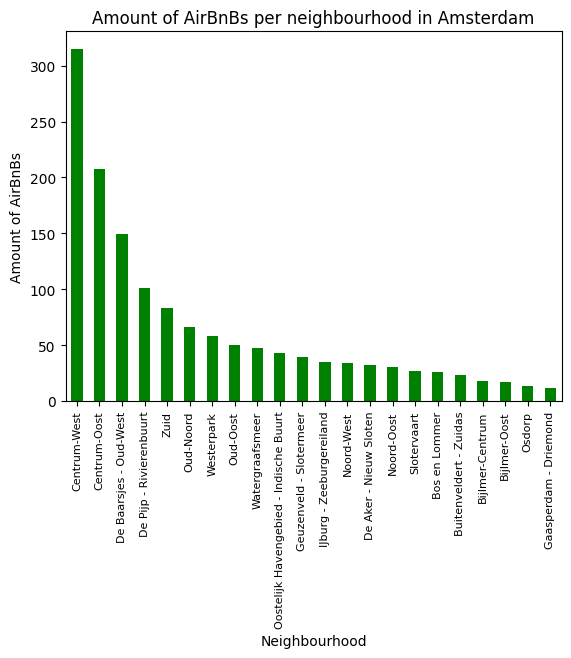

In [40]:
import matplotlib.pyplot as plt

wijk_counts = bnb_wp['neighbourhood'].value_counts()

print(wijk_counts)
print(type(wijk_counts))

wijk_counts.plot.bar(color = 'green')
plt.xlabel("Neighbourhood", size = 10)
plt.ylabel("Amount of AirBnBs", size = 10)
plt.xticks(rotation = 90, size = 8)
plt.title('Amount of AirBnBs per neighbourhood in Amsterdam', size = 12)

### Which street has the most AirBnb apartments

In [56]:
from geopy.geocoders import Nominatim

import geocoder

g = geocoder.osm([52.40164, 4.95106], method='reverse')
print(g.json['city'])
#print(g.json['street'])

bnb_street = bnb_df[['latitude', 'longitude']]

#print(bnb_street, '\n')

df_street = pd.DataFrame(columns=['coordinates'])

#for index in bnb_street.index:
#    coordinates = bnb_df['latitude'][index], bnb_df['longitude'][index]
#    g = geocoder.osm(coordinates, method='reverse')
#    street = g.json['street']
#    df_street.loc[index] = [{'street' : street, 'coordinates' : coordinates}]
#    df_street.loc[index] = [street, coordinates]
    

#    print(df_street.loc[street, 'street'], df_street.loc[coordinates, 'coordinates'])


#    g = geocoder.osm(df_street['coordinates'][index], method='reverse')



#for index in bnb_wp.index:
#    tax = bnb_wp['price'][index] * tourist_tax
#    df_tax.loc[index] = [tax]

list_streets = []
dict = {}

for index in bnb_street.index:
    coordinates = bnb_df['latitude'][index], bnb_df['longitude'][index]
    df_street.loc[index] = [coordinates]
    g = geocoder.osm(df_street['coordinates'][index], method='reverse')
    print(g.json['street'])
    list_streets.append(g.json['street'])
    set_st = set(list_streets)
#    for i in set_st:
#        x = list_streets.count(i)
        
#    df_street["streets"] = street


#print(df_street)

Amsterdam
Jisperveldstraat
Zoutkeetsplein
Centrale Groothandelsmarkt
IJsbaanpad
Derde Egelantiersdwarsstraat
Maassluisstraat


KeyboardInterrupt: 